## 6. Kalman Filter for Robot Localization
Simple 1D Kalman Filter for estimating position from noisy measurements.

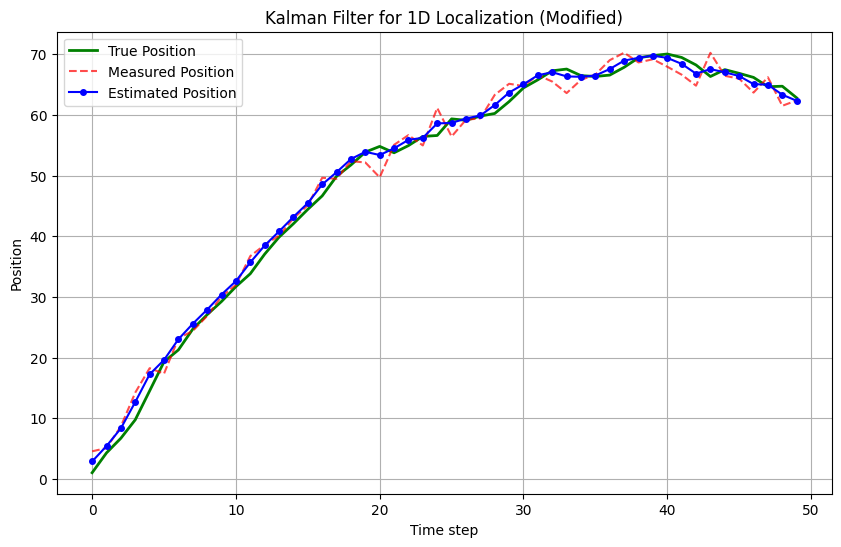

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
dt = 1.0
x = np.array([[0], [1]])  # Initial state (position and velocity)
A = np.array([[1, dt], [0, 1]])  # State transition matrix (position, velocity)
H = np.array([[1, 0]])  # Measurement matrix (we only measure position)
Q = np.eye(2) * 0.05  # Process noise covariance (increased noise)
R = np.eye(1) * 4  # Measurement noise covariance (increased noise)
P = np.eye(2)  # Initial error covariance

true_pos = []
measured_pos = []
estimated_pos = []

for t in range(50):
    x = A @ x  # Predict the true position and velocity
    true_pos.append(x[0, 0])
    z = x[0, 0] + np.random.randn() * 2  # Increase measurement noise
    measured_pos.append(z)

    x_pred = A @ x  # Predict the next state
    P_pred = A @ P @ A.T + Q  # Predict the next covariance
    K = P_pred @ H.T @ np.linalg.inv(H @ P_pred @ H.T + R)  # Kalman gain
    x = x_pred + K @ (z - H @ x_pred)  # Update the estimate
    P = (np.eye(2) - K @ H) @ P_pred  # Update the error covariance
    estimated_pos.append(x[0, 0])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(true_pos, label='True Position', color='g', linewidth=2)
plt.plot(measured_pos, label='Measured Position', linestyle='--', color='r', alpha=0.7)
plt.plot(estimated_pos, label='Estimated Position', linestyle='-', color='b', marker='o', markersize=4)
plt.legend(loc='upper left')
plt.title("Kalman Filter for 1D Localization (Modified)")
plt.xlabel("Time step")
plt.ylabel("Position")
plt.grid(True)
plt.show()
